In [1]:
# 1.2. Load Data

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import math

In [3]:
df0 = pd.read_csv('green_tripdata_2015-09.csv')

df0.head()

,Unnamed: 0,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
df0.drop(df0.columns[0], axis=1, inplace=True)

col_names=['VendorID','Lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','RateCodeID','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type']

df0.columns = col_names

In [5]:
df0.shape

(1494926, 21)

In [6]:
df = df0.copy()

In [7]:
# Checking the Dataset

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,1494926.0,1.782045,0.412857,1.000000,2.000000,2.000000,2.000000,2.000000
RateCodeID,1494926.0,1.097653,0.635944,1.000000,1.000000,1.000000,1.000000,99.000000
Pickup_longitude,1494926.0,-73.830839,2.776082,-83.319077,-73.959610,-73.945358,-73.917480,0.000000
Pickup_latitude,1494926.0,40.691144,1.530882,0.000000,40.698952,40.746738,40.802551,43.177261
Dropoff_longitude,1494926.0,-73.837278,2.677911,-83.427841,-73.967819,-73.945038,-73.910133,0.000000
Dropoff_latitude,1494926.0,40.692905,1.476698,0.000000,40.698776,40.747284,40.790146,42.799343
Passenger_count,1494926.0,1.370598,1.039426,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,1494926.0,2.968141,3.076621,0.000000,1.100000,1.980000,3.740000,603.100000
Fare_amount,1494926.0,12.543198,10.082781,-475.000000,6.500000,9.500000,15.500000,580.500000
Extra,1494926.0,0.351280,0.366310,-1.000000,0.000000,0.500000,0.500000,12.000000


In [9]:
df.drop('Ehail_fee', axis=1, inplace=True)

In [10]:
# 2. Histogram of Trip Distance

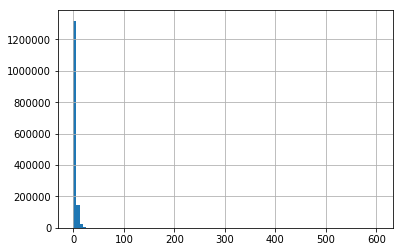

In [11]:
df['Trip_distance'].hist(bins=100)

In [12]:
df[(df.Trip_distance == 0)].shape[0] / df.shape[0] * 100

1.3774594862889533

In [13]:
df = df[~(df.Trip_distance == 0)]

In [14]:
Q1 = df['Trip_distance'].quantile(0.25)
Q3 = df['Trip_distance'].quantile(0.75)
IQR = Q3 - Q1

#Values between Q1-1.5IQR and Q3+1.5IQR
df2 = df.query('(@Q1 - 1.5 * @IQR) <= Trip_distance <= (@Q3 + 1.5 * @IQR)')

In [15]:
1 - df2.shape[0] / df.shape[0]

0.06753557877658656

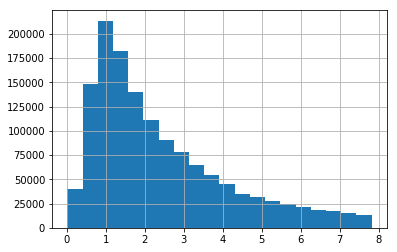

In [16]:
df2.Trip_distance.hist(bins=20)
# plt.xlim(0, 20)

In [17]:
df['log_Trip_distance'] = np.log(df['Trip_distance'])

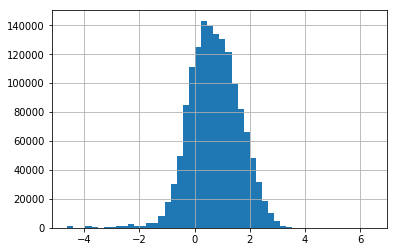

In [18]:
df['log_Trip_distance'].hist(bins=50)
# plt.xlim(0, 20)

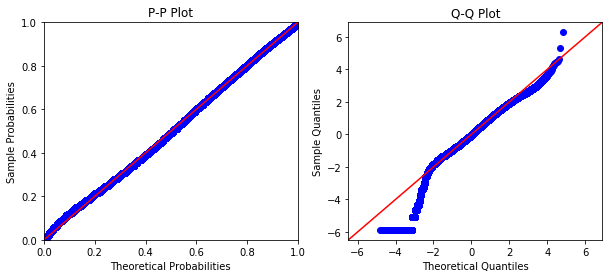

In [19]:
import statsmodels.graphics.gofplots as sm

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(df.log_Trip_distance, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()

In [20]:
df['log_Trip_distance_norm'] = (df['log_Trip_distance'] - df['log_Trip_distance'].mean()) / df['log_Trip_distance'].std()

In [21]:
df = df[(np.abs(df['log_Trip_distance_norm']) <= 3) | (df.log_Trip_distance.isnull())]

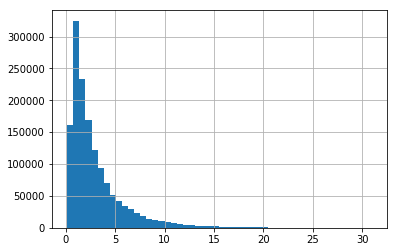

In [22]:
df['Trip_distance'].hist(bins=50)

In [23]:
from scipy.stats import kstest,lognorm

In [24]:
parameters = lognorm.fit(df['Trip_distance'].values)

x = np.linspace(0, 30, 300)
pdf = lognorm.pdf(x, parameters[0], parameters[1], parameters[2])

parameters

(0.8939758478116688, 0.07182157590351311, 1.9900852256267207)

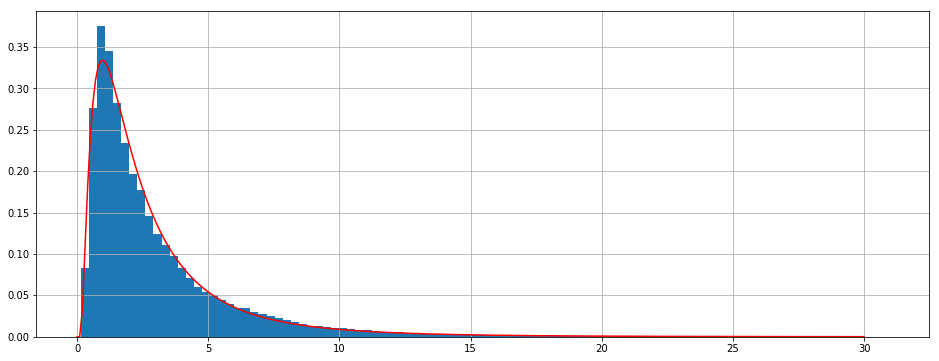

In [25]:
plt.figure(figsize=(16,6))

values, bins, _ = plt.hist(df['Trip_distance'].values, bins=100, normed=True)

plt.plot(x, pdf, 'r')

plt.grid()

In [26]:
# Kolmogorov-Smirnov Test
test_stat = kstest(values, 'lognorm', parameters)
test_stat

KstestResult(statistic=0.9823043600493014, pvalue=0.0)

In [27]:
df[~( (df['Fare_amount'] >= 2.5) & \
        (df['Extra'] >= 0) & \
        (df['MTA_tax'] >= 0) & \
        (df['Tip_amount'] >= 0) & \
        (df['Tolls_amount'] >= 0) & \
        (df['improvement_surcharge'] >= 0) & \
        (df['Total_amount'] >= 2.5) )].shape[0] / df0.shape[0] * 100

0.3297153170123471

In [28]:
df = df[(df['Fare_amount'] >= 2.5) & \
        (df['Extra'] >= 0) & \
        (df['MTA_tax'] >= 0) & \
        (df['Tip_amount'] >= 0) & \
        (df['Tolls_amount'] >= 0) & \
        (df['improvement_surcharge'] >= 0) & \
        (df['Total_amount'] >= 2.5)]

In [29]:
# 1.5. Add Useful Derived Variables

In [30]:
# Trip Duration:

In [31]:
df['Lpep_pickup_datetime'] = pd.to_datetime(df['Lpep_pickup_datetime'])
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'])

In [32]:
df['trip_duration'] = df['Lpep_dropoff_datetime'] - df['Lpep_pickup_datetime']

In [33]:
df['trip_duration'] = df['trip_duration'].dt.seconds / 60

In [34]:
df[['Trip_distance', 'trip_duration']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Trip_distance,1459375.0,3.017384,2.946969,0.14,1.120000,2.01,3.800000,30.93
trip_duration,1459375.0,20.435477,96.775769,0.00,6.383333,10.60,17.416667,1439.90


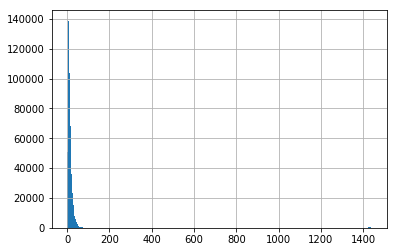

In [35]:
df['trip_duration'].hist(bins=1000)
# plt.xlim(0,100)

In [36]:
df = df[df['trip_duration'] > 0]

In [37]:
df['log_trip_duration'] = np.log(df['trip_duration'])

In [38]:
df['log_trip_duration_norm'] = (df['log_trip_duration'] - df['log_trip_duration'].mean()) / df['log_trip_duration'].std()

In [39]:
df = df[(np.abs(df['log_trip_duration_norm']) <= 3)]

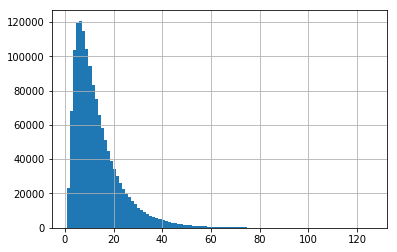

In [40]:
plt.hist(df['trip_duration'].values, bins=100)
plt.grid()

In [41]:
from scipy.stats import kstest,lognorm

parameters = lognorm.fit(df['trip_duration'].values)

x = np.linspace(0, 120, 121)
pdf = lognorm.pdf(x, parameters[0], parameters[1], parameters[2])

parameters

(0.6988860933055185, -0.2452485153912114, 10.747303177521037)

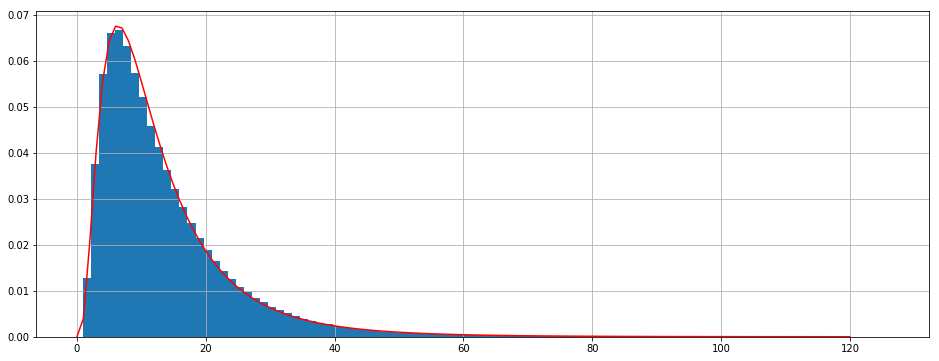

In [42]:
plt.figure(figsize=(16,6))

values, bins, _ = plt.hist(df['trip_duration'].values, bins=100, normed=True)

plt.plot(x, pdf, 'r')

plt.grid()

In [43]:
# Kolmogorov-Smirnov Test

test_stat = kstest(values, 'lognorm', parameters)

test_stat

KstestResult(statistic=0.9999997954245694, pvalue=0.0)

In [44]:
# Average Speed (MPH)

In [45]:
df['avg_speed_mph'] = df['Trip_distance'] / df['trip_duration'] * 60

In [46]:
df[['Trip_distance', 'avg_speed_mph']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Trip_distance,1446537.0,3.016333,2.937857,0.140000,1.130000,2.010000,3.80000,30.930000
avg_speed_mph,1446537.0,13.121240,6.888102,0.128824,9.491686,11.868132,15.12605,1166.666667


(0, 100)

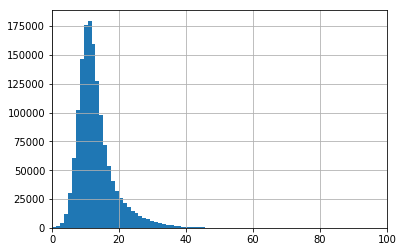

In [47]:
df['avg_speed_mph'].hist(bins=1000)
plt.xlim(0,100)

In [48]:
df['log_avg_speed_mph'] = np.log(df['avg_speed_mph'])

In [49]:
df['log_avg_speed_mph_norm'] = (df['log_avg_speed_mph'] - df['log_avg_speed_mph'].mean()) / df['log_avg_speed_mph'].std()

In [50]:
df2 = df[(np.abs(df['log_avg_speed_mph_norm']) <= 4)]

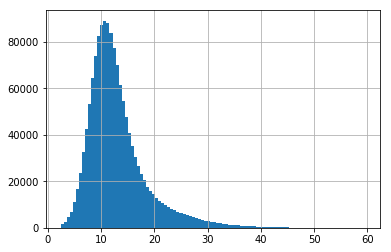

In [51]:
df2['avg_speed_mph'].hist(bins=100)
# plt.xlim(0,100)

In [52]:
df[~(df.avg_speed_mph <= 100)].shape

(248, 28)

In [53]:
df = df[df.avg_speed_mph <= 100]

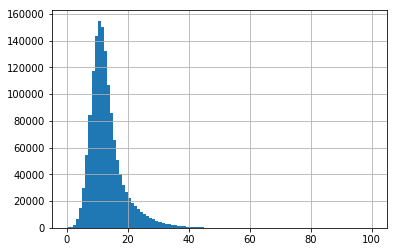

In [54]:
df['avg_speed_mph'].hist(bins=100)
# plt.xlim(0,100)

In [55]:
parameters = lognorm.fit(df['avg_speed_mph'].values, loc=0)

x = np.linspace(0, 60, 61)
pdf = lognorm.pdf(x, parameters[0], parameters[1], parameters[2])

parameters

(0.3715694899790002, -0.7645556560627436, 12.894365188966681)

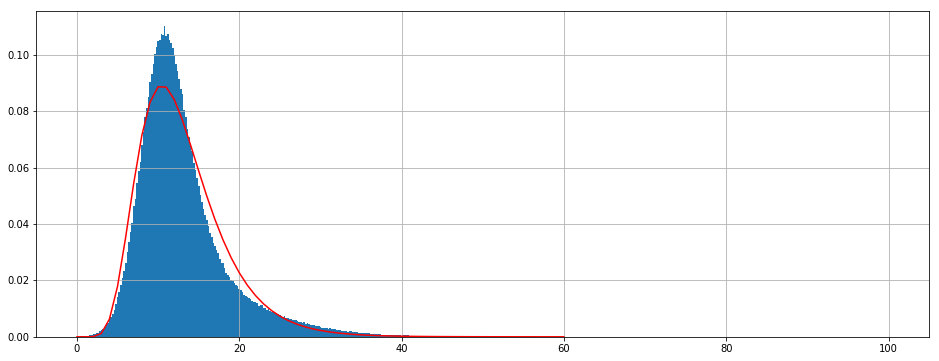

In [56]:
plt.figure(figsize=(16,6))

values, bins, _ = plt.hist(df['avg_speed_mph'].values, bins=500, normed=True)

plt.plot(x, pdf, 'r')

plt.grid()

In [57]:
# Kolmogorov-Smirnov Test

test_stat = kstest(values, 'lognorm', parameters)

test_stat

KstestResult(statistic=0.999999999999778, pvalue=0.0)

In [58]:
# 3. Mean and Median of Trip Distance by Hour of Day

In [59]:
df['time_of_day'] = df['Lpep_pickup_datetime'] + (df['Lpep_dropoff_datetime'] - df['Lpep_pickup_datetime'])/2

df['time_of_day_hour'] = df['time_of_day'].dt.hour

In [60]:
df['time_of_day_hour_sec'] = df['time_of_day'].dt.hour * 3600 + df['time_of_day'].dt.minute * 60 + df['time_of_day'].dt.second

In [61]:
df['cos_time_of_day'] = np.cos( df['time_of_day_hour_sec'] / 3600 / 24 * 2 * 3.14 )
df['sin_time_of_day'] = np.sin( df['time_of_day_hour_sec'] / 3600 / 24 * 2 * 3.14 )

In [62]:
df.head()

,VendorID,Lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,log_trip_duration,log_trip_duration_norm,avg_speed_mph,log_avg_speed_mph,log_avg_speed_mph_norm,time_of_day,time_of_day_hour,time_of_day_hour_sec,cos_time_of_day,sin_time_of_day
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.942608,-1.721359,13.792208,2.624104,0.332521,2015-09-01 00:03:07.000,0,187,0.999908,0.013592
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,1.410987,-1.153729,10.829268,2.382252,-0.272962,2015-09-01 00:04:39.000,0,279,0.999794,0.020278
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,1.410987,-1.153729,8.926829,2.189061,-0.756624,2015-09-01 00:02:17.000,0,137,0.999950,0.009958
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,1.544010,-0.992518,13.708185,2.617993,0.317223,2015-09-01 00:02:59.500,0,179,0.999915,0.013010
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,...,1.602749,-0.921332,17.275168,2.849270,0.896234,2015-09-01 00:03:21.000,0,201,0.999893,0.014609


In [63]:
df_mean = df[['Trip_distance','time_of_day_hour']].groupby('time_of_day_hour').mean()

df_med = df[['Trip_distance','time_of_day_hour']].groupby('time_of_day_hour').median()

In [64]:
df_stat = pd.concat([df_mean, df_med], axis=1)

df_stat.columns = ['mean','median']

In [65]:
df_stat

,mean,median
time_of_day_hour,,
0,3.224609,2.30
1,3.108717,2.20
2,3.145363,2.23
3,3.242177,2.30
4,3.599218,2.47
5,4.255968,3.00
6,4.082394,2.90
7,3.316178,2.18
8,3.050189,1.99


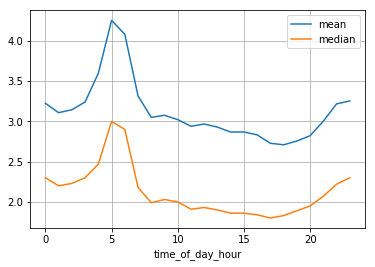

In [66]:
df_stat.plot()
plt.grid()

In [67]:
# 3.2 Airports

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [69]:
df_map = df

df_map = df_map[df_map['Pickup_longitude'] != 0]
df_map = df_map[df_map['Pickup_latitude'] != 0]
df_map = df_map[df_map['Dropoff_longitude'] != 0]
df_map = df_map[df_map['Dropoff_latitude'] != 0]

p1 = df_map['Pickup_longitude']
p2 = df_map['Pickup_latitude']

d1 = df_map['Dropoff_longitude']
d2 = df_map['Dropoff_latitude']

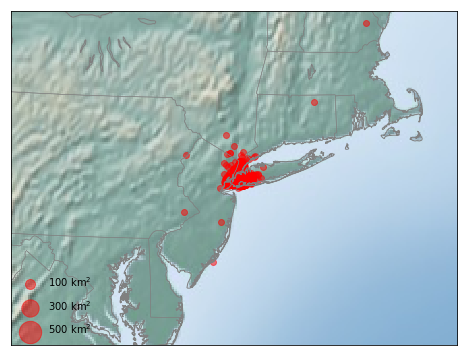

In [70]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40.71, lon_0=-74,
            width=0.8E6, height=0.6E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(p1.values, p2.values, latlon=True, color='red',
#           c=1, s=0.5,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], color='red', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [71]:
df_map = df_map[df_map['Pickup_latitude'] < 41.015106]

p1 = df_map['Pickup_longitude']
p2 = df_map['Pickup_latitude']

d1 = df_map['Dropoff_longitude']
d2 = df_map['Dropoff_latitude']

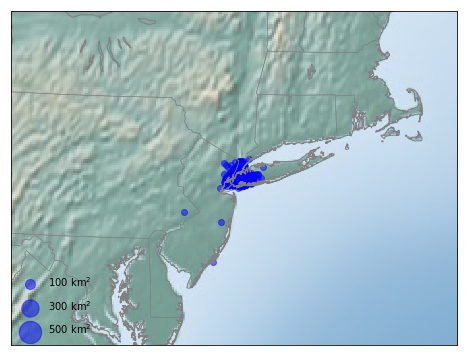

In [72]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=40.71, lon_0=-74,
            width=0.8E6, height=0.6E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(p1.values, p2.values, latlon=True, color='blue',
#           c=1, s=0.5,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], color='blue', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [73]:
df_map.sort_values(by='Pickup_latitude', ascending=False).head()

,VendorID,Lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,log_trip_duration,log_trip_duration_norm,avg_speed_mph,log_avg_speed_mph,log_avg_speed_mph_norm,time_of_day,time_of_day_hour,time_of_day_hour_sec,cos_time_of_day,sin_time_of_day
844860,2,2015-09-18 02:35:47,2015-09-18 02:37:04,N,1,-73.683144,41.006790,-73.702095,41.012238,1,...,0.249461,-2.561387,33.662338,3.516380,2.566367,2015-09-18 02:36:25.500,2,9385,0.776219,0.630464
5420,2,2015-09-01 07:42:18,2015-09-01 07:54:26,N,5,-73.836967,40.986603,-73.878235,40.886684,1,...,2.495956,0.161150,40.846154,3.709813,3.050634,2015-09-01 07:48:22.000,7,28102,-0.454493,0.890750
809609,2,2015-09-17 13:04:53,2015-09-17 13:11:18,N,1,-73.798645,40.983921,-73.792595,40.994469,1,...,1.858899,-0.610903,7.948052,2.072927,-1.047371,2015-09-17 13:08:05.500,13,47285,-0.956707,-0.291052
41871,2,2015-09-02 00:13:31,2015-09-02 00:25:03,N,1,-73.887604,40.974976,-73.886391,40.971882,1,...,2.445241,0.099688,1.560694,0.445130,-5.122620,2015-09-02 00:19:17.000,0,1157,0.996466,0.083998
198951,2,2015-09-05 03:46:16,2015-09-05 03:57:05,N,5,-73.862488,40.974659,-73.878136,40.886669,1,...,2.381088,0.021940,39.716487,3.681766,2.980419,2015-09-05 03:51:40.500,3,13900,0.531586,0.847004


In [74]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

def which_nyairport(row):
    
    point_pickup = Point(row['Pickup_latitude'], row['Pickup_longitude'])
    point_dropoff = Point(row['Dropoff_latitude'], row['Dropoff_longitude'])

    polygon_JFK = Polygon([(40.626564, -73.769620), (40.647086, -73.753584), (40.665283, -73.795774), (40.649619, -73.820645)])
    polygon_LGA = Polygon([(40.782644, -73.878180), (40.772181, -73.855460), (40.766393, -73.861282), (40.775103, -73.884141)])
    polygon_EWR = Polygon([(40.671140, -74.178618), (40.677716, -74.196698), (40.712696, -74.174370), (40.705277, -74.153975)])
    
    if polygon_JFK.contains(point_pickup) or polygon_JFK.contains(point_dropoff):
        return 'JFK' # John F. Kennedy International Airport

    if polygon_LGA.contains(point_pickup) or polygon_LGA.contains(point_dropoff):
        return 'LGA' # LaGuardia Airport

    if polygon_EWR.contains(point_pickup) or polygon_EWR.contains(point_dropoff):
        return 'EWR' # Newark Airport

    else:
        return '' # Not an Airport

In [75]:
df['Airport'] = df.apply(which_nyairport, axis=1) 

In [76]:
df['Airport'].value_counts()

       1412664
LGA      20094
JFK      12896
EWR        635
Name: Airport, dtype: int64

In [77]:
airport_mean = df[['Fare_amount', 'Tip_amount', 'Total_amount', 'Trip_distance', 'trip_duration', 'avg_speed_mph']].groupby(df['Airport']).mean()

In [78]:
airport_mean

,Fare_amount,Tip_amount,Total_amount,Trip_distance,trip_duration,avg_speed_mph
Airport,,,,,,
,12.142143,1.167481,14.554765,2.859477,13.135238,12.804949
EWR,75.504724,11.558425,97.668583,20.980472,46.937428,29.481873
JFK,41.473355,5.140962,48.589571,13.926311,34.894516,26.331652
LGA,21.192021,3.193428,26.599434,6.435168,18.039056,23.283982


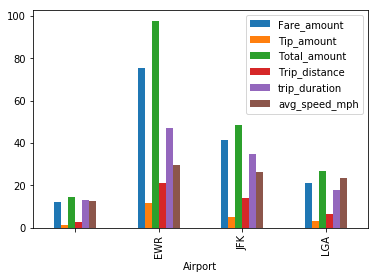

In [79]:
airport_mean.plot(kind='bar')

In [80]:
df.Pickup_latitude = df.Pickup_latitude.round(2)
df.Pickup_longitude = df.Pickup_longitude.round(2)

df['Pickup_loc'] = list(zip(df.Pickup_latitude, df.Pickup_longitude))


df.Dropoff_latitude = df.Dropoff_latitude.round(2)
df.Dropoff_longitude = df.Dropoff_longitude.round(2)

df['Dropoff_loc'] = list(zip(df.Dropoff_latitude, df.Dropoff_longitude))

In [81]:
df1 = df.copy()

In [82]:
df1.to_csv('green_tripdata_2015-09__cleaned.csv')

In [83]:
import pandas as pd
df = pd.read_csv('green_tripdata_2015-09__cleaned.csv')

In [84]:
# 4. Tip Percentage

In [85]:
df['tip_percent'] = df['Tip_amount'] / (df['Total_amount']) * 100

In [86]:
df.Payment_type.groupby(df['Payment_type']).count()

Payment_type
1    685131
2    755750
3      2446
4      2914
5        48
Name: Payment_type, dtype: int64

In [87]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import math

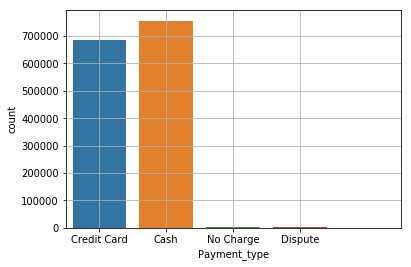

In [88]:
sns.countplot(x = 'Payment_type', data = df)
plt.grid()
plt.xticks([0,1,2,3], ['Credit Card', 'Cash', 'No Charge', 'Dispute'])
plt.show()

In [89]:
df[~(df.Payment_type == 1)].shape[0] / df.shape[0]

0.5262834744646471

In [90]:
df = df[(df.Payment_type == 1)]

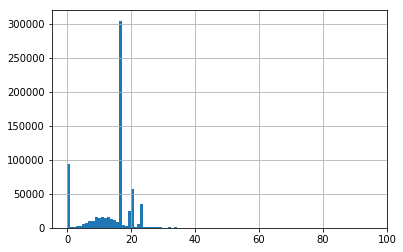

In [91]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [92]:
q95 = np.percentile(df.tip_percent, 99.9)
q95
df = df[df.tip_percent < q95]

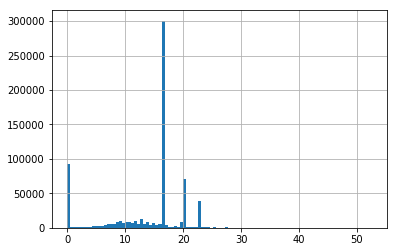

In [93]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [94]:
df['Tipped'] = 0
df['Tipped'][df.tip_percent > 0] = 1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
df.Tipped.groupby(df.Tipped).count()

Tipped
0     91136
1    593309
Name: Tipped, dtype: int64

In [96]:
df.drop('Lpep_pickup_datetime', axis=1, inplace=True)
df.drop('Lpep_dropoff_datetime', axis=1, inplace=True)
df.drop('Pickup_longitude', axis=1, inplace=True)
df.drop('Pickup_latitude', axis=1, inplace=True)
df.drop('Dropoff_longitude', axis=1, inplace=True)
df.drop('Dropoff_latitude', axis=1, inplace=True)

In [97]:
df['VendorID'] = df['VendorID'].astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].astype('category')
df['RateCodeID'] = df['RateCodeID'].astype('category')
df['Payment_type'] = df['Payment_type'].astype('category')
df['Trip_type'] = df['Trip_type'].astype('int').astype('category')
df['Airport'] = df['Airport'].astype('category')

df['Pickup_loc'] = df['Pickup_loc'].astype('category')
df['Dropoff_loc'] = df['Dropoff_loc'].astype('category')

In [98]:
df['VendorID'] = df['VendorID'].cat.codes.astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].cat.codes.astype('category')
df['RateCodeID'] = df['RateCodeID'].cat.codes.astype('category')
df['Payment_type'] = df['Payment_type'].cat.codes.astype('category')
df['Trip_type'] = df['Trip_type'].cat.codes.astype('int').astype('category')
df['Airport'] = df['Airport'].cat.codes.astype('category')

df["Pickup_loc"] = df["Pickup_loc"].cat.codes.astype('category')
df["Dropoff_loc"] = df["Dropoff_loc"].cat.codes.astype('category')

In [99]:
df_1 = df[df.Tipped == 1].sample(len(df[df.Tipped == 0]), replace=False)

df_bal = pd.concat([df_1, df[df.Tipped == 0]])

In [100]:
df_bal.Tipped.groupby(df_bal.Tipped).count()

Tipped
0    91136
1    91136
Name: Tipped, dtype: int64

In [101]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_Trip_distance_norm', 'trip_duration', 'log_trip_duration',
       'log_trip_duration_norm', 'avg_speed_mph', 'log_avg_speed_mph',
       'log_avg_speed_mph_norm', 'time_of_day', 'time_of_day_hour',
       'time_of_day_hour_sec', 'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc', 'tip_percent', 'Tipped'],
      dtype='object')

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_bal = df_bal[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc']]
y_bal = df_bal['Tipped']

In [103]:
m = LogisticRegression()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.6495951106039326

In [104]:
m = RandomForestClassifier()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.9962693117977528

In [105]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split

In [106]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.3)

In [107]:
# Test options and evaluation metric
seed = 7

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('NN', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_bal, y_bal, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.472750 (0.088218)
RF: 0.887460 (0.035391)
GB: 0.875335 (0.006557)
CART: 0.926165 (0.002285)
KNN: 0.693238 (0.019402)
GNB: 0.499534 (0.426221)
NN: 0.856977 (0.093099)


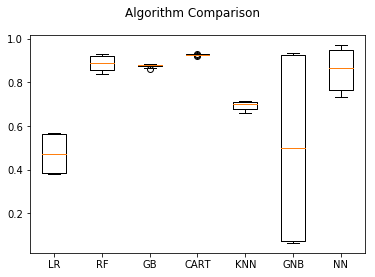

In [108]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc']]
y = df['tip_percent']
yc = df.Tipped

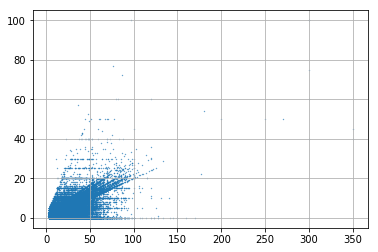

In [110]:
# plt.figure(figsize=(12,16))

plt.scatter((df.Fare_amount), df.Tip_amount, s=0.1)
plt.grid()

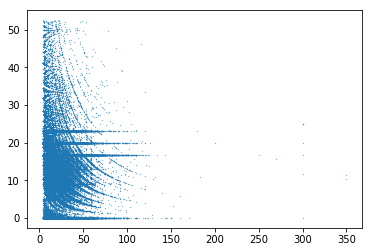

In [111]:
plt.scatter((df.Total_amount-df.Tip_amount), df['tip_percent'], s=0.05)

In [112]:
df_save = df.copy()

In [113]:
df = df_save.copy()

In [114]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_Trip_distance_norm', 'trip_duration', 'log_trip_duration',
       'log_trip_duration_norm', 'avg_speed_mph', 'log_avg_speed_mph',
       'log_avg_speed_mph_norm', 'time_of_day', 'time_of_day_hour',
       'time_of_day_hour_sec', 'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc', 'tip_percent', 'Tipped'],
      dtype='object')

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df2 = df[(df.Tip_amount > 0) & (df.Tip_amount <= 25)]

df2['log_tip_percent'] = np.log(df.tip_percent)

df2['tip_eq5'] = 0
df2['tip_eq5'][df.Tip_amount == 1] = 1


X = df2[['Passenger_count', 'Trip_distance', 
#         'Fare_amount', 'Extra', 'MTA_tax',
#        'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 
        'Total_amount',
       'log_Trip_distance', 
#         'log_Trip_distance_norm', 'trip_duration',
       'log_trip_duration', 
#         'log_trip_duration_norm', 'avg_speed_mph',
       'log_avg_speed_mph', 
#         'log_avg_speed_mph_norm', 
#         'tip_percent',
       'VendorID', 'Store_and_fwd_flag', 'RateCodeID', 
         'Trip_type', 'Airport']]
y = df2['tip_eq5']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\li

In [117]:
df2.tip_eq5.groupby(df2.tip_eq5).count()

tip_eq5
0    544597
1     48527
Name: tip_eq5, dtype: int64

In [118]:
# plt.hist(df2.log_tip_percent, bins=100)

In [119]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passenger_count,593124.0,1.372391,1.044323,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,593124.0,3.523907,3.175312,0.140000,1.350000,2.510000,4.570000,30.890000
Total_amount,593124.0,18.475104,11.781652,3.600000,10.300000,14.800000,23.150000,205.790000
log_Trip_distance,593124.0,0.919730,0.833465,-1.966113,0.300105,0.920283,1.519513,3.430433
log_trip_duration,593124.0,2.480836,0.704054,-0.105361,2.001480,2.510953,2.982309,4.834826
log_avg_speed_mph,593124.0,2.533239,0.393918,-2.049304,2.289351,2.510688,2.761359,4.573129


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.discriminant_analysis import LinearRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

In [125]:
# Test options and evaluation metric
seed = 7
scoring = 'mean_square_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('GB', GradientBoostingRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVM', SVR()))
# models.append(('NN', MLPRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.043951 (0.001197)


In [130]:
# y_pred = y_test.copy()
# y_pred[y_pred == y_pred] = 0
m = RandomForestClassifier()

m.fit(X_train, y_train)

y_pred = m.pred(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98    163095
          1       0.79      0.63      0.70     14843

avg / total       0.95      0.96      0.95    177938



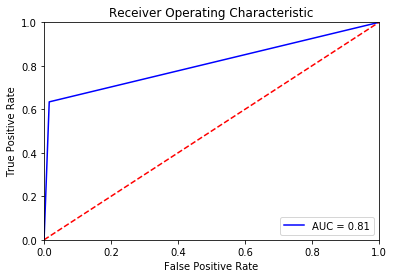

In [131]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
preds = y_pred
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [132]:
m = LogisticRegression()

m.fit(X_train, y_train)

y_pred = y_test.copy()
y_pred[y_pred == y_pred] = 0

y_pred[m.predict_proba(X_test)[:, 1] > 0.8] = 1

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    163095
          1       0.21      0.00      0.00     14843

avg / total       0.86      0.92      0.88    177938



In [133]:
m

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

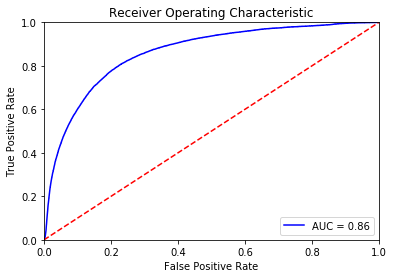

In [134]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = m.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
m = SVC()

m.fit(X_train, y_train)

y_pred = m.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = m.predict_proba(X_test)

preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, threshold

In [ ]:
probs = m.predict_proba(X)
preds = probs[:,1]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = [df.tip_percent.mean()] * len(y_test)

mean_squared_error(y_test, y_pred)
# r2_score(y_test, y_pred)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
y_res = y_test - y_pred

plt.scatter(y_pred, y_res)

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 0, scale = 5, size=100)   
stats.probplot(y_res, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = df.tip_percent,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
model.predict( X.iloc[800].reshape(1, -1) )

In [ ]:
y.iloc[800]

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

feature_importances

In [ ]:
df.tip_percent.mean()

In [ ]:
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)

m = sm.OLS(y_train, X2_train).fit()

m.summary()

In [ ]:
plt.scatter(m.predict(X2_train), m.resid, s=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.coef_

In [ ]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=10)

scores.mean()